In [308]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, os, warnings, cv2
import math


from keras.models import *
from keras.layers import *

import numpy as np
import pandas as pd 
warnings.filterwarnings("ignore")

In [320]:
def gaussian_k(x0,y0,sigma, width, height):
        """ Make a square gaussan kernel centered at (x0, y0) with sigma as SD.
        """i
        x = np.arange(0, width, 1, float) ## (width,) #just creates numbers from 1 to 320 shape (320,)
        y = np.arange(0, height, 1, float)[:, np.newaxis] ## (height,1)(320,1)
        return np.exp(-((x-x0)**2 + (y-y0)**2) / (2*sigma**2))

In [430]:
np.arange(0, 10, 1, float)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [321]:
def generate_hm(height, width ,landmarks,s=3):
        """ Generate a full Heap Map for every landmarks in an array
        Args:
            height    : The height of Heat Map (the height of target output)
            width     : The width  of Heat Map (the width of target output)
            joints    : [(x1,y1),(x2,y2)...] containing landmarks
            maxlenght : Lenght of the Bounding Box
        """
        Nlandmarks = len(landmarks) #equal to number of training examples
        hm = np.zeros((height, width, Nlandmarks), dtype = np.float32) #(320,320,1937)
        for i in range(Nlandmarks):
            if not np.array_equal(landmarks[i], [-1,-1]): ##remember that we filled all NA's with -1 so we only want non-zeros
             
                hm[:,:,i] = gaussian_k(landmarks[i][0], #x's in the landmark
                                        landmarks[i][1], #y's in the landmark
                                        s,height, width)
            else:
                hm[:,:,i] = np.zeros((height,width))
        return hm

In [380]:
Nlandmarks=len(landmarks)
hm = np.zeros((320, 320, Nlandmarks), dtype = np.float32)

In [381]:
range(Nlandmarks)

range(0, 1)

In [392]:
df_new.shape[0]

1937

In [432]:
landmarks #there should be df_new.shape[0] of these outermost loop should run from 0 to df.shape[0][i]

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [395]:
len(landmarks[0][0])

10

In [397]:
train=[]
for i in range(Nlandmarks):
    for j in range(10):
        train.append(gaussian_k(landmarks[i][0][j],landmarks[i][1][j],5,320, 320))

In [400]:
train = np.array(train)

In [401]:
train.shape

(10, 320, 320)

In [377]:
landmarks[0][1]

1_y     206.738876
2_y     319.151054
3_y     626.411007
4_y     707.347775
5_y     433.062061
6_y     740.322014
7_y     666.879391
8_y     701.352459
9_y     388.097190
10_y    476.528103
Name: 0, dtype: float64

In [367]:

x=df_new[columns_lmxy[::2]].iloc[0]
y=df_new[df.columns[::2][1:11]].iloc[0]

In [402]:
landmarks=[]
for i in range(df_new.shape[0]):
    x=df_new[columns_lmxy[::2]].iloc[i]
    y=df_new[df.columns[::2][1:11]].iloc[i]
    landmarks.append([x,y])

In [414]:
landmarks[0]

[1_x      266.040984
 2_x      529.834895
 3_x     1024.448478
 4_x     1091.895785
 5_x      576.298595
 6_x     1105.385246
 7_x      769.647541
 8_x      628.757611
 9_x      233.066745
 10_x     595.783372
 Name: 0, dtype: float64, 1_y     206.738876
 2_y     319.151054
 3_y     626.411007
 4_y     707.347775
 5_y     433.062061
 6_y     740.322014
 7_y     666.879391
 8_y     701.352459
 9_y     388.097190
 10_y    476.528103
 Name: 0, dtype: float64]

In [427]:
Nlandmarks=10
height =10
width=10
sigma=2

train=[]
for i in range(1):
    for j in range(Nlandmarks):
        train.append(gaussian_k(landmarks[i][0][j],landmarks[i][1][j],sigma,height, width))

In [428]:
train = np.array(train)
train.reshape(1,height,width,Nlandmarks)

array([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.,

In [411]:
new_train=train.reshape(df_new.shape[0],width,height,Nlandmarks)
new_train.shape

(1937, 320, 320, 10)

In [409]:
y_train.shape

(50, 320, 320, 10)

In [322]:
def get_y_as_heatmap(df,height,width,sigma):
    
    columns_lmxy = df.columns[1:21]  ## the last column contains Image
    columns_lm = [] 
    for c in columns_lmxy:
        c = c[:-2]
        if c not in columns_lm:
            columns_lm.extend([c])
    
    y_train = []
    for i in range(df.shape[0]):
        landmarks = []
        for colnm in columns_lm:
            x = df[colnm + "_x"].iloc[i]
            y = df[colnm + "_y"].iloc[i]
            landmarks.append([x,y])
            
        y_train.append(generate_hm(height, width, landmarks, sigma))
    y_train = np.array(y_train)
    
    
    return(y_train,df[columns_lmxy],columns_lmxy)

In [312]:
from PIL import Image
from matplotlib.pyplot import imshow
import os

#get the list of all images in the folder
def get_imlist(path):
    return [os.path.join(f) for f in os.listdir(path) if f.endswith(".jpg")]

In [287]:
import PIL
from PIL import Image
from matplotlib.pyplot import imshow
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io
from skimage.color import rgb2grey
from skimage.transform import resize

In [450]:
im_list = get_imlist("../data/Train2")
im_list[0]

'A001 - 20170120_100715.jpg'

In [451]:
xl = pd.ExcelFile("../data/annotations_right.xlsx")
df1 = xl.parse('annotations_right')
df2 = xl.parse('annotations_left')

In [452]:
path_im = "../data/Train2/" + im_list[0]
im = np.array(PIL.Image.open(path_im))
width = im.shape[1] *4

In [453]:
df2['1_x']=width-df2['1_x']-1
df2['2_x']=width-df2['2_x']-1
df2['3_x']=width-df2['3_x']-1 
df2['4_x']=width-df2['4_x']-1 
df2['5_x']=width-df2['5_x']-1 
df2['6_x']=width-df2['6_x']-1 
df2['7_x']=width-df2['7_x']-1
df2['8_x']=width-df2['8_x']-1
df2['9_x']=width-df2['9_x']-1
df2['10_x']=width-df2['10_x']-1

In [454]:
df =df2.append(df1,ignore_index = True)

In [455]:
df.head()

,Image,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,...,8_x,8_y,9_x,9_y,10_x,10_y,x11,y11,Side,Code
0,A001 - 20170120_100715.jpg,266.040984,206.738876,529.834895,319.151054,1024.448478,626.411007,1091.895785,707.347775,576.298595,...,628.757611,701.352459,233.066745,388.097190,595.783372,476.528103,936.518735,359.619438,Left,1
1,A001 - 20170120_101256.jpg,376.954333,197.745902,654.237705,322.148712,1139.858314,666.879391,1199.811475,746.317330,690.209602,...,729.179157,711.844262,340.982436,377.605386,705.197892,481.024590,831.600703,349.127635,Left,1
2,A001 - 20170120_101810.jpg,228.570258,212.734192,514.846604,302.663934,1048.429742,570.954333,1139.858314,651.891101,580.795082,...,649.741218,681.867682,210.584309,401.586651,597.282201,460.040984,956.003513,364.115925,Left,1
3,A001 - 20170120_102837.jpg,239.062061,220.228337,534.331382,347.628806,1042.434426,659.385246,1117.375878,743.319672,576.298595,...,622.762295,741.820843,206.087822,422.570258,601.778689,516.996487,953.005855,388.097190,Left,1
4,A001 - 20170120_103322.jpg,438.406323,146.785714,696.204918,305.661593,1145.853630,686.364169,1210.303279,785.286885,724.682670,...,729.179157,692.359485,370.959016,329.642857,735.174473,473.530445,786.635831,317.652225,Left,1


In [456]:
im = df['Image']
b=im.tolist()
a=[]
ind=[]
for i in range(0,len(im_list)):
  ind = b.index(im_list[i])
  a.append(ind)
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [457]:
df_new = df.iloc[a]
len(df_new)

1937

In [458]:
#create variables for the image names and their annotations
image = df_new['Image']
x1 = df_new['1_x']/4
x2 = df_new['2_x']/4
x3 = df_new['3_x']/4 
x4 = df_new['4_x']/4 
x5 = df_new['5_x']/4 
x6 = df_new['6_x']/4 
x7 = df_new['7_x']/4
x8 = df_new['8_x']/4
x9 = df_new['9_x']/4 
x10 = df_new['10_x']/4
#x11 = df1['x11']
y1 = df_new['1_y']/3.2
y2 = df_new['2_y']/3.2
y3 = df_new['3_y']/3.2
y4 = df_new['4_y']/3.2
y5 = df_new['5_y']/3.2
y6 = df_new['6_y']/3.2
y7 = df_new['7_y']/3.2
y8 = df_new['8_y']/3.2
y9 = df_new['9_y']/3.2
y10 = df_new['10_y']/3.2
#y11 = df1['y11']

In [459]:
df3=df_new
df3['1_x']=df_new['1_x']/4
df3['2_x']=df_new['2_x']/4
df3['3_x']=df_new['3_x']/4
df3['4_x']=df_new['4_x']/4 
df3['5_x']=df_new['5_x']/4 
df3['6_x']=df_new['6_x']/4 
df3['7_x']=df_new['7_x']/4
df3['8_x']=df_new['8_x']/4
df3['9_x']=df_new['9_x']/4
df3['10_x']=df_new['10_x']/4
df3['1_y']=df_new['1_y']/3.2
df3['2_y']=df_new['2_y']/3.2
df3['3_y']=df_new['3_y']/3.2
df3['4_y']=df_new['4_y']/3.2
df3['5_y']=df_new['5_y']/3.2
df3['6_y']=df_new['6_y']/3.2
df3['7_y']=df_new['7_y']/3.2
df3['8_y']=df_new['8_y']/3.2
df3['9_y']=df_new['9_y']/3.2
df3['10_y']=df_new['10_y']/3.2

In [460]:
df3.head()

,Image,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,...,8_x,8_y,9_x,9_y,10_x,10_y,x11,y11,Side,Code
0,A001 - 20170120_100715.jpg,66.510246,64.605899,132.458724,99.734704,256.112119,195.753440,272.973946,221.046180,144.074649,...,157.189403,219.172643,58.266686,121.280372,148.945843,148.915032,936.518735,359.619438,Left,1
1,A001 - 20170120_101256.jpg,94.238583,61.795594,163.559426,100.671472,284.964578,208.399810,299.952869,233.224166,172.552400,...,182.294789,222.451332,85.245609,118.001683,176.299473,150.320184,831.600703,349.127635,Left,1
2,A001 - 20170120_101810.jpg,57.142564,66.479435,128.711651,94.582480,262.107436,178.423229,284.964578,203.715969,145.198770,...,162.435304,213.083650,52.646077,125.495828,149.320550,143.762807,956.003513,364.115925,Left,1
3,A001 - 20170120_102837.jpg,59.765515,68.821355,133.582845,108.634002,260.608607,206.057889,279.343970,232.287398,144.074649,...,155.690574,231.819013,51.521956,132.053206,150.444672,161.561402,953.005855,388.097190,Left,1
4,A001 - 20170120_103322.jpg,109.601581,45.870536,174.051230,95.519248,286.463407,214.488803,302.575820,245.402152,181.170667,...,182.294789,216.362339,92.739754,103.013393,183.793618,147.978264,786.635831,317.652225,Left,1


Text(0.5, 1.0, 'A001 - 20170120_100715.jpg')

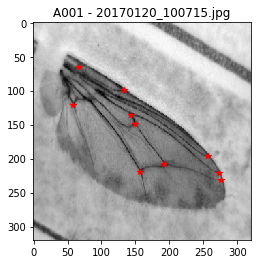

In [462]:
### Example image with annotations
from pylab import *

i=a[0]

# read image to array
path_im = '../data/Train2/' + image[i]
im = array(PIL.Image.open(path_im))

# plot the image
imshow(im)# plot the image

# some points
x = [x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i]]
y = [y1[i],y2[i],y3[i],y4[i],y5[i],y6[i],y7[i],y8[i],y9[i],y10[i]]

# plot the points with red star-markers
plot(x,y,"r*")

title(image[i])

In [298]:
x =[0 for p in range(2000)]

In [299]:
for i in range(0,50):
    path_im = "../data/Train2/" + image[a[i]]
    x[i]=array(color.rgb2gray(imread(path_im)))

In [300]:
x[0].shape

(320, 320)

In [301]:
xx = x[0:50];

In [302]:
for i in range(50):
    xx[i]=np.reshape(x[i],(-1,320,320,1))
xx[0].shape

(1, 320, 320, 1)

In [303]:
X = np.vstack(xx) 
X_train = X.astype(np.float32)
X_train.shape

(50, 320, 320, 1)

In [442]:
 y, y0, nm_landmarks = get_y_as_heatmap(df3,height=320,width=320, sigma=5)

In [305]:
nm_landmarks

Index(['1_x', '1_y', '2_x', '2_y', '3_x', '3_y', '4_x', '4_y', '5_x', '5_y',
       '6_x', '6_y', '7_x', '7_y', '8_x', '8_y', '9_x', '9_y', '10_x', '10_y'],
      dtype='object')

In [444]:
y_train=y[:50]
y_train0 =y0[:50]

In [445]:
print (X_train.shape,y_train.shape, y_train0.shape)

(50, 320, 320, 1) (50, 320, 320, 10) (50, 20)


In [443]:
y_train[0].shape

(320, 320, 10)

In [412]:
new_train[0]

array([[[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        ...,
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+

In [256]:
nm_landmarks[::2]

Index(['1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x'], dtype='object')

In [447]:
X_train.shape

(50, 320, 320, 1)

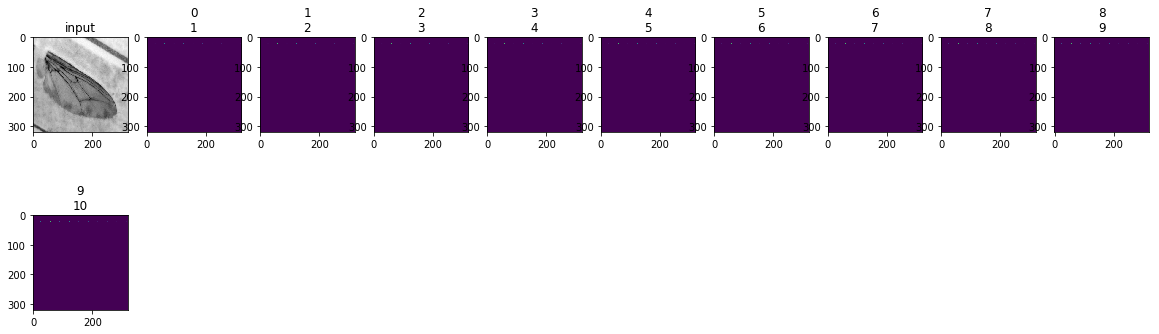

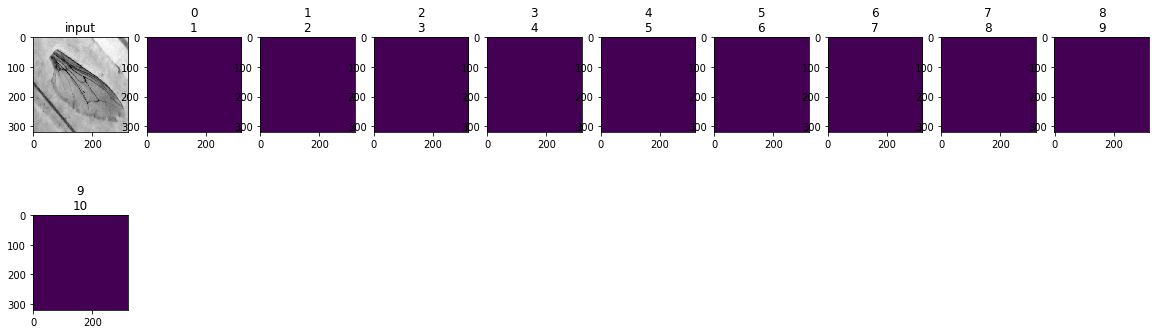

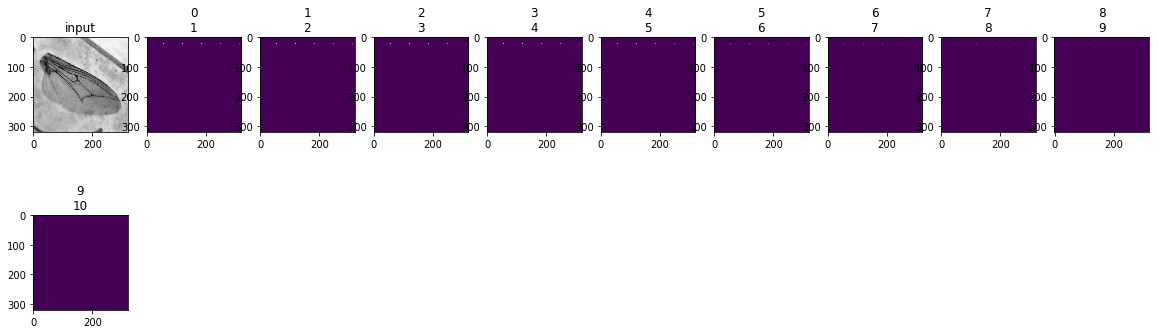

In [446]:
#Nplot = y_train.shape[3]+1
Nplot=20

for i in range(3):
    fig = plt.figure(figsize=(20,6))
    ax = fig.add_subplot(2,Nplot/2,1)
    ax.imshow(X_train[i,:,:,0],cmap="gray")
    ax.set_title("input")
    for j, lab in enumerate(nm_landmarks[::2]):
        ax = fig.add_subplot(2,Nplot/2,j+2)
        ax.imshow(new_train[i,:,:,j])
        ax.set_title(str(j) +"\n" + lab[:-2] )
    plt.show()

In [266]:
prop_train = 0.9
Ntrain = int(X_train.shape[0]*prop_train)
X_tra, y_tra, X_val,y_val = X_train[:Ntrain],y_train[:Ntrain],X_train[Ntrain:],y_train[Ntrain:]
del X_train, y_train

In [271]:
input_height, input_width = 320, 320
## output shape is the same as input
output_height, output_width = input_height, input_width 
n = 32*10
nClasses = 10
nfmp_block1 = 64
nfmp_block2 = 128

IMAGE_ORDERING =  "channels_last" 
img_input = Input(shape=(input_height,input_width, 1)) 

# Encoder Block 1
x = Conv2D(nfmp_block1, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
x = Conv2D(nfmp_block1, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
block1 = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    
# Encoder Block 2
x = Conv2D(nfmp_block2, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(block1)
x = Conv2D(nfmp_block2, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    
## bottoleneck    
o = (Conv2D(n, (input_height/4, input_width/4), activation='relu' , padding='same', name="bottleneck_1", data_format=IMAGE_ORDERING))(x)
o = (Conv2D(n , ( 1 , 1 ) , activation='relu' , padding='same', name="bottleneck_2", data_format=IMAGE_ORDERING))(o)


## upsamping to bring the feature map size to be the same as the one from block1
## o_block1 = Conv2DTranspose(nfmp_block1, kernel_size=(2,2),  strides=(2,2), use_bias=False, name='upsample_1', data_format=IMAGE_ORDERING )(o)
## o = Add()([o_block1,block1])
## output   = Conv2DTranspose(nClasses,    kernel_size=(2,2),  strides=(2,2), use_bias=False, name='upsample_2', data_format=IMAGE_ORDERING )(o)

## Decoder Block
## upsampling to bring the feature map size to be the same as the input image i.e., heatmap size
output   = Conv2DTranspose(nClasses,    kernel_size=(4,4),  strides=(4,4), use_bias=False, name='upsample_2', data_format=IMAGE_ORDERING )(o)

## Reshaping is necessary to use sample_weight_mode="temporal" which assumes 3 dimensional output shape
## See below for the discussion of weights
output = Reshape((output_width*input_height*nClasses,1))(output)
model = Model(img_input, output)
model.summary()

model.compile(loss='mse',optimizer="rmsprop",sample_weight_mode="temporal")

InvalidArgumentError: Value for attr 'T' of float is not in the list of allowed values: int32, int64
	; NodeDef: {{node RandomUniform}}; Op<name=RandomUniform; signature=shape:T -> output:dtype; attr=seed:int,default=0; attr=seed2:int,default=0; attr=dtype:type,allowed=[DT_HALF, DT_BFLOAT16, DT_FLOAT, DT_DOUBLE]; attr=T:type,allowed=[DT_INT32, DT_INT64]; is_stateful=true> [Op:RandomUniform]